<a href="https://colab.research.google.com/github/fsantamaria1/Bird_Classification/blob/main/Bird_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi-Class Bird Species Classification

# 1. Get the data including the csv with labels, as well as train and test images

In [40]:
#Import necessary libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pathlib
import os
import tensorflow as tf
import tensorflow_hub as hub
import random
import matplotlib.image as mpimg
import os
from fastai.vision import *
from fastai.metrics import *
from google.colab import files

In [37]:
# Run this to select the kaggle.json file containing the API token
files.upload()

{}

In [38]:
# Let's make sure the kaggle.json file is present.
!ls -lha kaggle.json

-rw-r--r-- 1 root root 71 Jun  6 22:47 kaggle.json


In [18]:
# Next, install the Kaggle API client.
!pip install -q kaggle

In [19]:
# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [22]:
# # List available datasets.
# !kaggle datasets list
!kaggle datasets list -s birds

ref                                                      title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
gpiosenka/100-bird-species                               BIRDS 525  SPECIES- IMAGE CLASSIFICATION           2GB  2023-04-20 13:49:44          44951        999  0.9411765        
zhangjuefei/birds-bones-and-living-habits                Birds' Bones and Living Habits                    10KB  2017-01-18 03:53:49           4073         81  0.88235295       
fleanend/birds-songs-numeric-dataset                     Birds' Songs Numeric Dataset                      25MB  2019-04-01 09:09:46           1648         34  0.9411765        
ichhadhari/indian-birds                                  Indian-Birds-Species-Image-Classification          5G

In [23]:
# Copy the bird species dataset locally.
!kaggle datasets download -d gpiosenka/100-bird-species

100% 1.95G/1.96G [01:11<00:00, 39.3MB/s]
100% 1.96G/1.96G [01:11<00:00, 29.3MB/s]


In [25]:
#Make sure the zip file is there
!ls

100-bird-species.zip  drive  kaggle.json  sample_data


In [26]:
#Unzip file
!unzip 100-bird-species.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/WHITE TAILED TROPIC/120.jpg  
  inflating: train/WHITE TAILED TROPIC/121.jpg  
  inflating: train/WHITE TAILED TROPIC/122.jpg  
  inflating: train/WHITE TAILED TROPIC/123.jpg  
  inflating: train/WHITE TAILED TROPIC/124.jpg  
  inflating: train/WHITE TAILED TROPIC/125.jpg  
  inflating: train/WHITE TAILED TROPIC/126.jpg  
  inflating: train/WHITE TAILED TROPIC/127.jpg  
  inflating: train/WHITE TAILED TROPIC/128.jpg  
  inflating: train/WHITE TAILED TROPIC/129.jpg  
  inflating: train/WHITE TAILED TROPIC/130.jpg  
  inflating: train/WHITE TAILED TROPIC/131.jpg  
  inflating: train/WHITE TAILED TROPIC/132.jpg  
  inflating: train/WHITE TAILED TROPIC/133.jpg  
  inflating: train/WHITE TAILED TROPIC/134.jpg  
  inflating: train/WHITE TAILED TROPIC/135.jpg  
  inflating: train/WHITE TAILED TROPIC/136.jpg  
  inflating: train/WHITE TAILED TROPIC/137.jpg  
  inflating: train/WHITE TAILED TROPIC/138.jpg  
  inflating: train

In [28]:
#Make sure the files and folders are there
!ls

 100-bird-species.zip  'EfficientNetB0-525-(224 X 224)- 98.97.h5'   test
 birds.csv	        kaggle.json				    train
 drive		        sample_data				    valid


In [31]:
birds_df = pd.read_csv('birds.csv')
birds_df.head()

,class id,filepaths,labels,data set,scientific name
0,0.0,train/ABBOTTS BABBLER/001.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI
1,0.0,train/ABBOTTS BABBLER/007.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI
2,0.0,train/ABBOTTS BABBLER/008.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI
3,0.0,train/ABBOTTS BABBLER/009.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI
4,0.0,train/ABBOTTS BABBLER/002.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI


In [32]:
# List directories
train_dir = "train/"
test_dir = "test/"
valid_dir = "valid/"

In [33]:

def view_rand_image(directory, bird_class):
  #Create the entire path
  path = directory + bird_class

  #Get an image from the path
  image = random.sample(os.listdir(path), 1)

  image_path = path + "/" + image[0]

  #Plot the image
  img = mpimg.imread(image_path)
  plt.imshow(img)
  plt.title(bird_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}")

  return img


Image shape: (224, 224, 3)


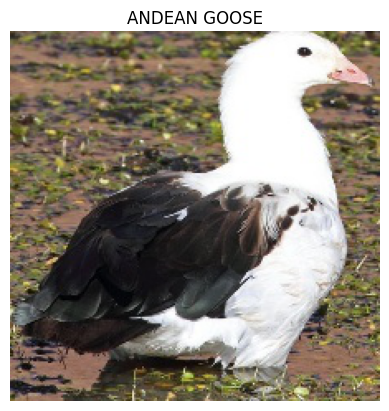

In [34]:
#View random image
img = view_rand_image(valid_dir, birds_df["labels"][4000])

In [48]:
#Load the data as an ImageDataBunch
from fastai.vision.data import ImageDataLoaders
from fastai.vision.augment import aug_transforms

bird_data = ImageDataLoaders.from_folder("/content", bs=16, size=224,
                                  train="train", test="test", valid="valid",
                                  ds_tfms = aug_transforms())

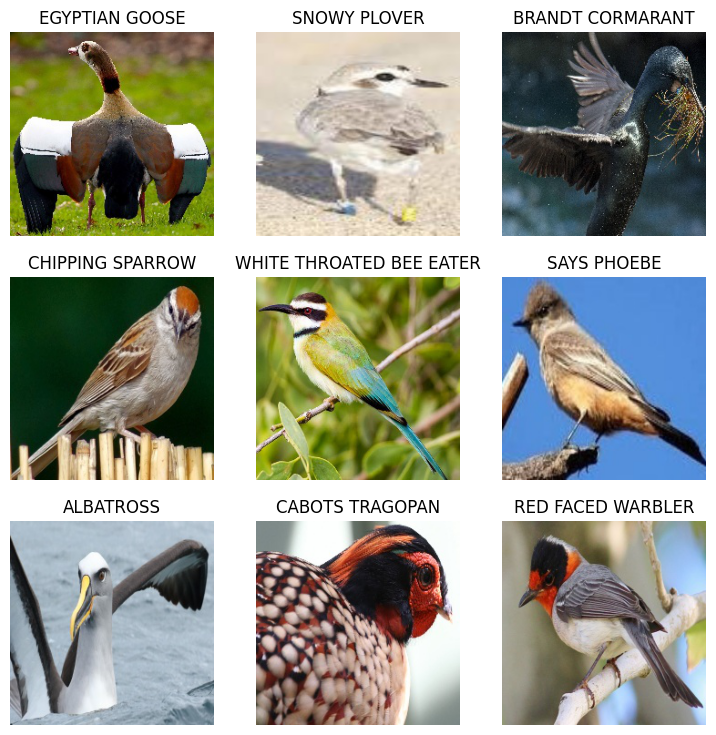

In [49]:
bird_data.show_batch()

In [55]:
from fastai.vision.learner import vision_learner
from fastai.vision.models import resnet18
from fastai.metrics import accuracy


#Define the model
model = vision_learner(bird_data, resnet18, metrics=accuracy)

In [1]:
#Check for GPU availability
import tensorflow as tf
print("GPU", "Available (Yes!)" if tf.config.list_physical_devices("GPU") else "not available")

GPU Available (Yes!)
